## Parte 9

### Correlação 90 , 80, 70

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.recurrent import GRU
from keras.layers.recurrent import SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import pandas as pd

import seaborn as sns
import aux_func as f
color = sns.color_palette()

In [3]:
data_file = 'best_windows.csv'
data_use_percent = 1

feat= "all"

dataframe = pd.read_csv(data_file, engine='python')

df_top_pos = dataframe.drop( ['press_t0-2','press_t0-5','press_t0-23', 'rad_t0','temp_t0-2'] ,axis=1)
df_top_pos.head()

rad_t0-2  rad_t0-5  rad_t0-11  rad_t0-23   temp_t0  temp_t0-5  temp_t0-11  \
0  0.854503  0.057386   0.000000   0.659793  0.876106   0.539823    0.203540   
1  0.864284  0.236567   0.000000   0.314696  0.716814   0.601770    0.168142   
2  0.869786  0.721844   0.000000   0.264016  0.752212   0.707965    0.150442   
3  0.501764  0.854503   0.000000   0.043631  0.716814   0.796460    0.132743   
4  0.307360  0.864284   0.010472   0.003012  0.442478   0.761062    0.176991   

   temp_t0-23  press_t0  press_t0-11  press_t0-35  press_t0-47  press_t0-59  \
0    0.849558  0.557143     0.557143     0.414286     0.328571     0.585714   
1    0.743363  0.471429     0.514286     0.328571     0.271429     0.500000   
2    0.637168  0.414286     0.542857     0.342857     0.271429     0.514286   
3    0.539823  0.385714     0.571429     0.385714     0.342857     0.514286   
4    0.486726  0.400000     0.585714     0.428571     0.442857     0.557143   

   act_t+1  
0    0.866  
1    0.545  
2    0.406  
3    0.327  
4    0.356

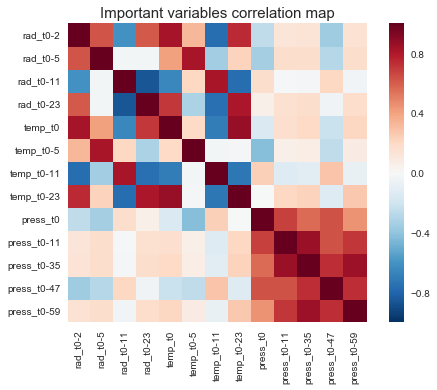

In [22]:
corrmat = df_top_pos.drop('act_t+1',axis=1).corr(method='spearman')
#f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [8]:
corrmat.abs()

rad_t0-2  rad_t0-5  rad_t0-11  rad_t0-23   temp_t0  temp_t0-5  \
rad_t0-2     1.000000  0.626634   0.603304   0.613229  0.835189   0.328627   
rad_t0-5     0.626634  1.000000   0.030714   0.023742  0.413898   0.823249   
rad_t0-11    0.603304  0.030714   1.000000   0.856760  0.655974   0.210147   
rad_t0-23    0.613229  0.023742   0.856760   1.000000  0.706039   0.318525   
temp_t0      0.835189  0.413898   0.655974   0.706039  1.000000   0.201062   
temp_t0-5    0.328627  0.823249   0.210147   0.318525  0.201062   1.000000   
temp_t0-11   0.762415  0.351119   0.820810   0.756390  0.702573   0.027849   
temp_t0-23   0.747520  0.232690   0.763168   0.816280  0.873920   0.022683   
press_t0     0.252390  0.338477   0.172107   0.056749  0.153315   0.423278   
press_t0-11  0.132171  0.178811   0.010044   0.156795  0.167440   0.062141   
press_t0-35  0.136256  0.177744   0.019905   0.174816  0.202480   0.071622   
press_t0-47  0.352953  0.281680   0.204027   0.042842  0.220517   0.250673   
press_t0-59  0.148876  0.178148   0.033322   0.183112  0.212454   0.079959   

             temp_t0-11  temp_t0-23  press_t0  press_t0-11  press_t0-35  \
rad_t0-2       0.762415    0.747520  0.252390     0.132171     0.136256   
rad_t0-5       0.351119    0.232690  0.338477     0.178811     0.177744   
rad_t0-11      0.820810    0.763168  0.172107     0.010044     0.019905   
rad_t0-23      0.756390    0.816280  0.056749     0.156795     0.174816   
temp_t0        0.702573    0.873920  0.153315     0.167440     0.202480   
temp_t0-5      0.027849    0.022683  0.423278     0.062141     0.071622   
temp_t0-11     1.000000    0.724574  0.238689     0.132461     0.111572   
temp_t0-23     0.724574    1.000000  0.000847     0.209721     0.230453   
press_t0       0.238689    0.000847  1.000000     0.681913     0.570241   
press_t0-11    0.132461    0.209721  0.681913     1.000000     0.860852   
press_t0-35    0.111572    0.230453  0.570241     0.860852     1.000000   
press_t0-47    0.285817    0.129309  0.638545     0.635028     0.740608   
press_t0-59    0.073322    0.272298  0.450452     0.712577     0.854492   

             press_t0-47  press_t0-59  
rad_t0-2        0.352953     0.148876  
rad_t0-5        0.281680     0.178148  
rad_t0-11       0.204027     0.033322  
rad_t0-23       0.042842     0.183112  
temp_t0         0.220517     0.212454  
temp_t0-5       0.250673     0.079959  
temp_t0-11      0.285817     0.073322  
temp_t0-23      0.129309     0.272298  
press_t0        0.638545     0.450452  
press_t0-11     0.635028     0.712577  
press_t0-35     0.740608     0.854492  
press_t0-47     1.000000     0.737682  
press_t0-59     0.737682     1.000000


- rad_t0-2       0.038179
- rad_t0-5       0.091641
- rad_t0-11      0.107854
- rad_t0-23      0.043770
- temp_t0        0.003800

- temp_t0-5      0.023076
- temp_t0-11     0.014276
- temp_t0-23     0.147509
- press_t0       0.006961

- press_t0-11    0.003357

- press_t0-35    0.002401
- press_t0-47    0.006858
- press_t0-59    0.007397

### Checar Features que apresentam correlação maior que 80% e eliminar a de menor score; 

- rad_t0-2 e temp_t0 ; Eliminar temp_t0
- rad_t0-5 e temp_t0-5 ; Eliminar temp_t0-5
- rad_t0-11 e rad_t0-23 ; Eliminar rad_t0-23
- rad_t0-11 e temp_t0-11 ; Eliminar temp_t0-11
- press_t0-11 e press_t0-35 ; Eliminar press_t0-35

In [13]:
df_cor_80 = df_top_pos.drop(['temp_t0','temp_t0-5','rad_t0-23','temp_t0-11','press_t0-35'],axis=1)
df_cor_80.head()

rad_t0-2  rad_t0-5  rad_t0-11  temp_t0-23  press_t0  press_t0-11  \
0  0.854503  0.057386   0.000000    0.849558  0.557143     0.557143   
1  0.864284  0.236567   0.000000    0.743363  0.471429     0.514286   
2  0.869786  0.721844   0.000000    0.637168  0.414286     0.542857   
3  0.501764  0.854503   0.000000    0.539823  0.385714     0.571429   
4  0.307360  0.864284   0.010472    0.486726  0.400000     0.585714   

   press_t0-47  press_t0-59  act_t+1  
0     0.328571     0.585714    0.866  
1     0.271429     0.500000    0.545  
2     0.271429     0.514286    0.406  
3     0.342857     0.514286    0.327  
4     0.442857     0.557143    0.356

### Checar Features que apresentam correlação maior que 70% e eliminar a de menor score

In [17]:
corrmat70 = df_cor_80.drop('act_t+1',axis=1).corr(method='spearman')

corrmat70.abs()

rad_t0-2  rad_t0-5  rad_t0-11  temp_t0-23  press_t0  press_t0-11  \
rad_t0-2     1.000000  0.626634   0.603304    0.747520  0.252390     0.132171   
rad_t0-5     0.626634  1.000000   0.030714    0.232690  0.338477     0.178811   
rad_t0-11    0.603304  0.030714   1.000000    0.763168  0.172107     0.010044   
temp_t0-23   0.747520  0.232690   0.763168    1.000000  0.000847     0.209721   
press_t0     0.252390  0.338477   0.172107    0.000847  1.000000     0.681913   
press_t0-11  0.132171  0.178811   0.010044    0.209721  0.681913     1.000000   
press_t0-47  0.352953  0.281680   0.204027    0.129309  0.638545     0.635028   
press_t0-59  0.148876  0.178148   0.033322    0.272298  0.450452     0.712577   

             press_t0-47  press_t0-59  
rad_t0-2        0.352953     0.148876  
rad_t0-5        0.281680     0.178148  
rad_t0-11       0.204027     0.033322  
temp_t0-23      0.129309     0.272298  
press_t0        0.638545     0.450452  
press_t0-11     0.635028     0.712577  
press_t0-47     1.000000     0.737682  
press_t0-59     0.737682     1.000000

- rad_t0-2 e temp_t23 ; Eliminar rad_t0-2
- rad_t0-11 e temp_t23 ; Eliminar rad_t0-11
- press_t0-59 e press_t0-11 ; Eliminar press_t0-11
- press_t0-59 e press_t0-47 ; Eliminar press_t0-47

In [18]:
df_cor_70 = df_cor_80.drop(['press_t0-47','rad_t0-2','rad_t0-11','press_t0-11'],axis=1)
df_cor_70.head()


rad_t0-5  temp_t0-23  press_t0  press_t0-59  act_t+1
0  0.057386    0.849558  0.557143     0.585714    0.866
1  0.236567    0.743363  0.471429     0.500000    0.545
2  0.721844    0.637168  0.414286     0.514286    0.406
3  0.854503    0.539823  0.385714     0.514286    0.327
4  0.864284    0.486726  0.400000     0.557143    0.356

### Checar Features que apresentam correlação maior que 60% e eliminar a de menor score

In [19]:
corrmat60 = df_cor_70.drop('act_t+1',axis=1).corr(method='spearman')
corrmat60.abs()

rad_t0-5  temp_t0-23  press_t0  press_t0-59
rad_t0-5     1.000000    0.232690  0.338477     0.178148
temp_t0-23   0.232690    1.000000  0.000847     0.272298
press_t0     0.338477    0.000847  1.000000     0.450452
press_t0-59  0.178148    0.272298  0.450452     1.000000

Nenhuma

### Treinar os conjuntos df_cor_80 e df_cor_80

In [24]:
def getTestData(dataframe):
    global testObserved
    dataset2 = dataframe.values
    train_size = int(len(dataset2) * 0.70)
    test_size = len(dataset2) - train_size
    train, test = dataset2[0:train_size,:], dataset2[train_size:len(dataset2),:]
    testX, testY = f.create_dataset(test, f.getFeatureSize(dataframe), 0)
    testObserved = testY
    return np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

def gru_2x2(feature_dim):
    model = Sequential()
    model.add(GRU(2, input_shape = (1,feature_dim), return_sequences=True))
    model.add(GRU(2,  return_sequences=False))
    model.add(Dense(1, use_bias=True))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


def train_predict(arq, dataframe, times = 1):
    
    global curr_dataX
    global curr_dataY
    dataset2 = dataframe.values
    #resizing dataset len for faster tests 
    dataset2 = dataset2[:int(len(dataset2)*data_use_percent)]
    #dataset2 = dataset2.astype('float32')
    
    feature_dim = f.getFeatureSize(dataset2)
    print("dim = "+str(feature_dim))
    
    # split into train and test sets
    train_size = int(len(dataset2) * 0.70)
    test_size = len(dataset2) - train_size
    train, test = dataset2[0:train_size,:], dataset2[train_size:len(dataset2),:]

    

    trainX, trainY = f.create_dataset(train, feature_dim, 0)
    testX, testY = f.create_dataset(test, feature_dim, 0)

    
    # reshape input to be [samples, time steps, features]
    #trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    #testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0],  1, testX.shape[1]))
    
    curr_dataX = trainX
    curr_dataY = trainY

    #trainScore = []
    testRMSE = []
    testMAE = []
    testR2 = []
   
    print('Test Socore: ')
    print('Execution, RMSE, MAE, r2')
    for i in range(times):
        model = gru_2x2(feature_dim);
        model.fit(trainX, trainY, epochs=300, verbose=0)

        trainPredict = model.predict(trainX)
        testPredict = model.predict(testX)
        #trainScore.append(math.sqrt(mean_squared_error(trainY, trainPredict)))
        #print(str(i)+' Train Score: %.6f RMSE' % (trainScore[i]))
        testRMSE.append(math.sqrt(mean_squared_error(testY, testPredict)))
        testMAE.append(mean_absolute_error(testY, testPredict))
        testR2.append(r2_score(testY, testPredict))
        print(str(i)+' , %.6f , %.6f , %.6f ' % (testRMSE[i], testMAE[i], testR2[i]))

    #print("Train avg: " + str(numpy.average(trainScore)))
    print("Test_RMSE_avg: " + str(np.average(testRMSE)))
    print("Test_MAE_avg: " + str(np.average(testMAE)))
    print("Test_R2_avg: " + str(np.average(testR2)))
    
    return model

#### Modelo com correlação maior que 80

In [26]:
model = train_predict('gru_2x2',df_cor_80,30)

dim = 8
Test Socore: 
Execution, RMSE, MAE, r2
0 , 0.220482 , 0.174822 , 0.834162 
1 , 0.212851 , 0.165401 , 0.845443 
2 , 0.209291 , 0.160321 , 0.850570 
3 , 0.220446 , 0.170788 , 0.834218 
4 , 0.214727 , 0.166137 , 0.842706 
5 , 0.209488 , 0.164203 , 0.850289 
6 , 0.212327 , 0.162582 , 0.846203 
7 , 0.222809 , 0.171733 , 0.830644 
8 , 0.221292 , 0.172163 , 0.832942 
9 , 0.213310 , 0.160315 , 0.844776 
10 , 0.207386 , 0.159262 , 0.853278 
11 , 0.199351 , 0.155250 , 0.864428 
12 , 0.209530 , 0.160961 , 0.850229 
13 , 0.219180 , 0.169584 , 0.836115 
14 , 0.210645 , 0.164066 , 0.848631 
15 , 0.217865 , 0.172645 , 0.838076 
16 , 0.211393 , 0.164723 , 0.847553 
17 , 0.201990 , 0.154591 , 0.860813 
18 , 0.210324 , 0.161243 , 0.849092 
19 , 0.213232 , 0.160524 , 0.844889 
20 , 0.209430 , 0.162731 , 0.850371 
21 , 0.211703 , 0.164427 , 0.847107 
22 , 0.208532 , 0.160654 , 0.851652 
23 , 0.207878 , 0.162961 , 0.852582 
24 , 0.205000 , 0.157485 , 0.856635 
25 , 0.208628 , 0.162837 , 0.851515 
2

#### Modelo com correlação maior que 70

In [27]:
model = train_predict('gru_2x2',df_cor_70,30)

dim = 4
Test Socore: 
Execution, RMSE, MAE, r2
0 , 0.231017 , 0.179720 , 0.817936 
1 , 0.242056 , 0.189417 , 0.800121 
2 , 0.238912 , 0.183984 , 0.805279 
3 , 0.236322 , 0.189626 , 0.809478 
4 , 0.258819 , 0.204756 , 0.771478 
5 , 0.241636 , 0.191435 , 0.800814 
6 , 0.245535 , 0.188935 , 0.794334 
7 , 0.246976 , 0.196403 , 0.791912 
8 , 0.234806 , 0.185964 , 0.811915 
9 , 0.241173 , 0.185304 , 0.801576 
10 , 0.238267 , 0.183950 , 0.806330 
11 , 0.231038 , 0.173828 , 0.817904 
12 , 0.249126 , 0.196532 , 0.788274 
13 , 0.244248 , 0.189573 , 0.796484 
14 , 0.245252 , 0.195477 , 0.794808 
15 , 0.258674 , 0.202551 , 0.771734 
16 , 0.252510 , 0.200774 , 0.782482 
17 , 0.248896 , 0.188118 , 0.788665 
18 , 0.243124 , 0.194806 , 0.798352 
19 , 0.258154 , 0.206400 , 0.772651 
20 , 0.243595 , 0.189812 , 0.797571 
21 , 0.259429 , 0.201393 , 0.770399 
22 , 0.241105 , 0.191754 , 0.801689 
23 , 0.241342 , 0.192033 , 0.801298 
24 , 0.252912 , 0.200850 , 0.781790 
25 , 0.259482 , 0.210017 , 0.770306 
2